<a href="https://colab.research.google.com/github/kdj0712/study_data_analytics/blob/main/docs/quests/EDAs/EDA_LetalCarOfContractType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사전 준비 작업

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# 데이터 파일 로딩 후 정확한 분석을 위해 혼선이 생길 가능성이 있는 요소 제거
df_lcoct = pd.read_csv("/content/LetalCarOfContractType(1).csv")
df_lcoct.dropna(inplace=True)
df_lcoct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40480 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40480 non-null  int64  
 1   type_of_contract   40480 non-null  object 
 2   type_of_contract2  40480 non-null  object 
 3   channel            40480 non-null  object 
 4   datetime           40480 non-null  object 
 5   Term               40480 non-null  int64  
 6   payment_type       40480 non-null  object 
 7   product            40480 non-null  object 
 8   amount             40480 non-null  int64  
 9   state              40480 non-null  object 
 10  overdue_count      40480 non-null  int64  
 11  overdue            40480 non-null  object 
 12  credit rating      40480 non-null  float64
 13  bank               40480 non-null  object 
 14  cancellation       40480 non-null  object 
 15  age                40480 non-null  float64
 16  Mileage            404

In [3]:
# 연령에 의한 이상치 분석 후 이상치 제거
Q1 = df_lcoct['age'].describe().loc['25%']
Q3 = df_lcoct['age'].describe().loc['75%']
IQR = Q3 - Q1
bound_max = Q3 + 1.5 * IQR
conditions = f' age <= {bound_max}'
df_lcoct.query(conditions, inplace=True)

In [4]:
# 신용등급에 의한 이상치 분석 후 이상치 제거
conditions_1 = '`credit rating` != 0.0'
df_lcoct.query(conditions_1, inplace=True)

In [5]:
# 연체횟수에 의한 이상치 분석 후 이상치 제거
conditions_2 = 'overdue_count != -1'
df_lcoct.query(conditions_2, inplace=True)

In [6]:
# 용이한 분석을 위해 연령의 그룹화 진행
bins = np.arange(20.0, 91, 10)  # 10살 간격으로 묶음
labels = ["20대", "30대", "40대", "50대", "60대", "70대", "80대"]
df_lcoct['age_group'] = pd.cut(df_lcoct['age'], bins,labels=labels,right=False,)
df_lcoct1 = df_lcoct.query('state != "계약확정"')

In [7]:
df_lcoct['age'].unique()

array([43., 62., 60., 51., 52., 59., 61., 24., 37., 28., 29., 34., 54.,
       33., 48., 47., 41., 73., 55., 74., 40., 64., 65., 46., 26., 31.,
       32., 36., 25., 42., 45., 58., 49., 56., 69., 53., 22., 63., 38.,
       30., 50., 57., 44., 27., 76., 23., 39., 66., 72., 67., 70., 20.,
       71., 68., 75., 83., 81., 77., 35., 82., 21., 80., 79., 84., 78.])

In [8]:
df_lcoct['age_group'].unique()

['40대', '60대', '50대', '20대', '30대', '70대', '80대']
Categories (7, object): ['20대' < '30대' < '40대' < '50대' < '60대' < '70대' < '80대']

In [9]:
df_lcoct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40237 entries, 0 to 51303
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 40237 non-null  int64   
 1   type_of_contract   40237 non-null  object  
 2   type_of_contract2  40237 non-null  object  
 3   channel            40237 non-null  object  
 4   datetime           40237 non-null  object  
 5   Term               40237 non-null  int64   
 6   payment_type       40237 non-null  object  
 7   product            40237 non-null  object  
 8   amount             40237 non-null  int64   
 9   state              40237 non-null  object  
 10  overdue_count      40237 non-null  int64   
 11  overdue            40237 non-null  object  
 12  credit rating      40237 non-null  float64 
 13  bank               40237 non-null  object  
 14  cancellation       40237 non-null  object  
 15  age                40237 non-null  float64 
 16  Mile

## 제안 : 해약률 분석
 + 문제 정의 : 다양한 변수들(계약 유형, 납부 유형, 연령 등)을 분석하여 고객의 계약 해약률을 분석합니다.
 + 배경 : 해약률을 분석함으로써 위험 요소를 식별하고, 해약률을 감소시킬 수 있는 전략을 개발합니다.


### 1. 기술 데이터 분석
- 분석에 필요한 항목을 산출한 뒤 해당 항목의 개별적 요소를 분석

In [10]:
# 계약 유형(1) 분포 : 분포 확인
df_lcoct['type_of_contract'].value_counts()

렌탈     38212
멤버십     2025
Name: type_of_contract, dtype: int64

In [11]:
# 계약 유형(2) 분포 : 분포 확인
df_lcoct['type_of_contract2'].value_counts()

Promotion           12951
Normal              12033
Package              9053
Extension_Rental     4175
TAS                  2012
TA1                     8
TA3                     5
Name: type_of_contract2, dtype: int64

In [12]:
# 고객 연령층 확인
df_lcoct['age'].value_counts()

43.0    1165
40.0    1145
42.0    1129
47.0    1112
48.0    1111
        ... 
81.0      61
80.0      54
82.0      53
83.0      50
84.0      35
Name: age, Length: 65, dtype: int64

In [13]:
# 이용 고객 대금 납부 유형 확인
df_lcoct['payment_type'].value_counts()

CMS     26106
카드이체    14131
Name: payment_type, dtype: int64

In [14]:
# 이용 고객 계약 현황(취소 여부)
df_lcoct['cancellation'].value_counts()

정상    39572
해약      665
Name: cancellation, dtype: int64

In [15]:
df_lcoct['state'].value_counts()

계약확정     39535
해약확정       665
기간만료        25
해약진행중       12
Name: state, dtype: int64

In [16]:
# 이용 고객 연체 여부
df_lcoct['overdue'].value_counts()

없음    38785
있음     1452
Name: overdue, dtype: int64

In [17]:
# 연체 고객 연체 횟수
df_lcoct['overdue_count'].value_counts()

0     38785
1       585
2       268
3       100
12       86
4        78
10       53
5        52
7        44
8        41
11       37
9        33
14       31
13       30
15       10
6         4
Name: overdue_count, dtype: int64

In [18]:
# 이용 고객 신용 등급
df_lcoct['credit rating'].value_counts()

1.0     10199
2.0      7774
4.0      5118
3.0      4757
5.0      4098
6.0      3603
7.0      2576
8.0      1457
9.0       610
10.0       45
Name: credit rating, dtype: int64

### 2. 탐색 데이터 분석 (EDA)

In [19]:
# 계약 상태가 계약 확정이 아닌 고객만 분류
df_lcoct1 = df_lcoct
bins = np.arange(20.0, 91, 10)  # 10살 간격으로 묶음
labels = ["20대", "30대", "40대", "50대", "60대", "70대", "80대"]
df_lcoct1['age_group'] = pd.cut(df_lcoct1['age'], bins,labels=labels,right=False)
df_lcoct1_1 = df_lcoct1.query('state != "계약확정"')
df_lcoct1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 4 to 51303
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 702 non-null    int64   
 1   type_of_contract   702 non-null    object  
 2   type_of_contract2  702 non-null    object  
 3   channel            702 non-null    object  
 4   datetime           702 non-null    object  
 5   Term               702 non-null    int64   
 6   payment_type       702 non-null    object  
 7   product            702 non-null    object  
 8   amount             702 non-null    int64   
 9   state              702 non-null    object  
 10  overdue_count      702 non-null    int64   
 11  overdue            702 non-null    object  
 12  credit rating      702 non-null    float64 
 13  bank               702 non-null    object  
 14  cancellation       702 non-null    object  
 15  age                702 non-null    float64 
 16  Mileag

In [20]:
df_lcoct1_1['credit rating'].value_counts()

3.0     134
2.0     132
4.0     113
1.0      88
5.0      71
6.0      62
7.0      52
8.0      36
9.0      13
10.0      1
Name: credit rating, dtype: int64

In [21]:
print(df_lcoct1['age'].max())

84.0


In [22]:
df_lcoct1['age'].unique()

array([43., 62., 60., 51., 52., 59., 61., 24., 37., 28., 29., 34., 54.,
       33., 48., 47., 41., 73., 55., 74., 40., 64., 65., 46., 26., 31.,
       32., 36., 25., 42., 45., 58., 49., 56., 69., 53., 22., 63., 38.,
       30., 50., 57., 44., 27., 76., 23., 39., 66., 72., 67., 70., 20.,
       71., 68., 75., 83., 81., 77., 35., 82., 21., 80., 79., 84., 78.])

In [23]:
df_lcoct1_1['age_group'].unique()

['50대', '30대', '40대', '70대', '20대', '60대', '80대']
Categories (7, object): ['20대' < '30대' < '40대' < '50대' < '60대' < '70대' < '80대']

In [24]:
df_lcoct1_1['overdue'].unique()

array(['있음', '없음'], dtype=object)

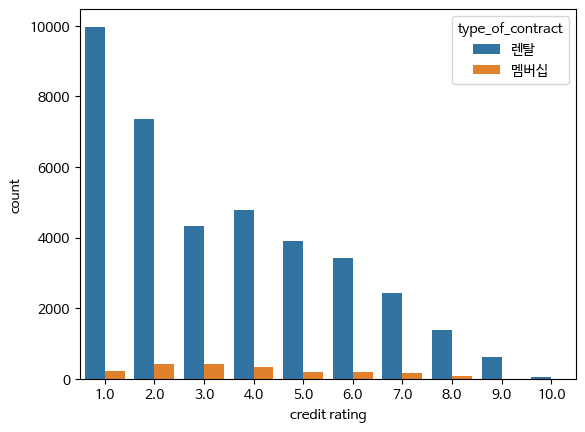

In [25]:
# 전체 고객의 신용 등급 별 가입 유형
sns.countplot(data=df_lcoct , x='credit rating', hue='type_of_contract')
plt.show()

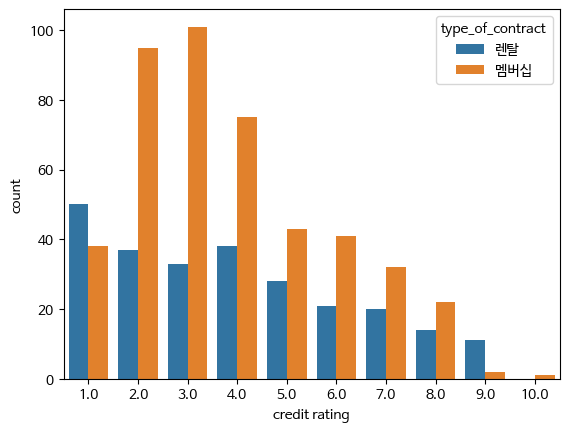

In [26]:
# 해약 고객의 신용 등급 별 가입 유형
sns.countplot(data=df_lcoct1_1 , x='credit rating', hue='type_of_contract')
plt.show()

<Figure size 1000x1000 with 0 Axes>

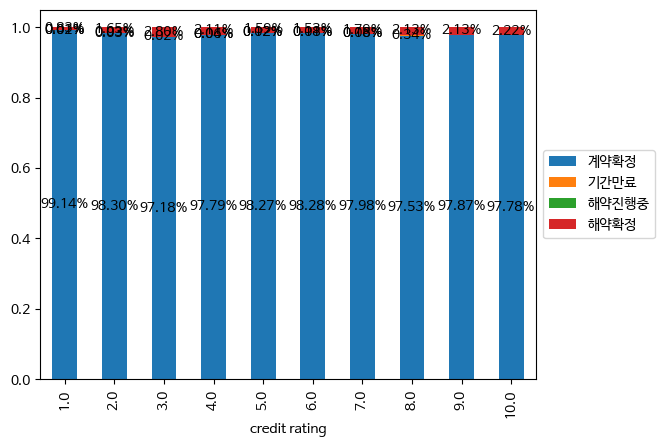

In [27]:
# 전체 고객 신용등급 별 계약 비중
plt.figure(figsize=(10,10))
grouped = df_lcoct.groupby('credit rating')['state'].value_counts(normalize=True).unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height != 0:
      ax.text(x + width/2,
              y + height/2,
              '{:.2%}'.format(height),
              horizontalalignment='center',
              verticalalignment='center')
plt.show()

<Figure size 1000x1000 with 0 Axes>

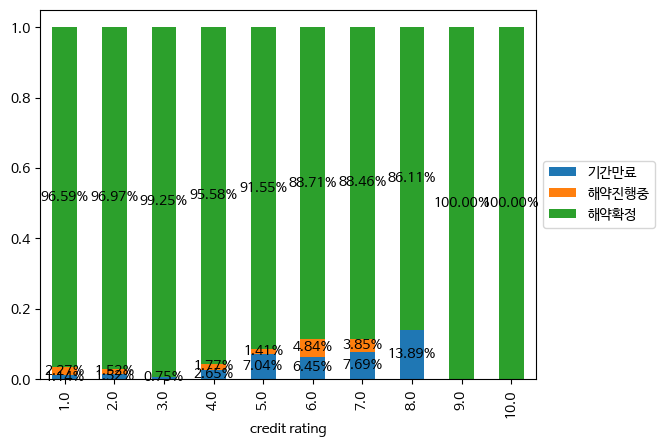

In [40]:
# 해약 고객 내 신용등급 별 해약 현황 비율
plt.figure(figsize=(10,10))
grouped = df_lcoct1_1.groupby('credit rating')['state'].value_counts(normalize=True).unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height != 0:
      ax.text(x + width/2,
              y + height/2,
              '{:.2%}'.format(height),
              horizontalalignment='center',
              verticalalignment='center')
plt.show()

<Figure size 1000x1000 with 0 Axes>

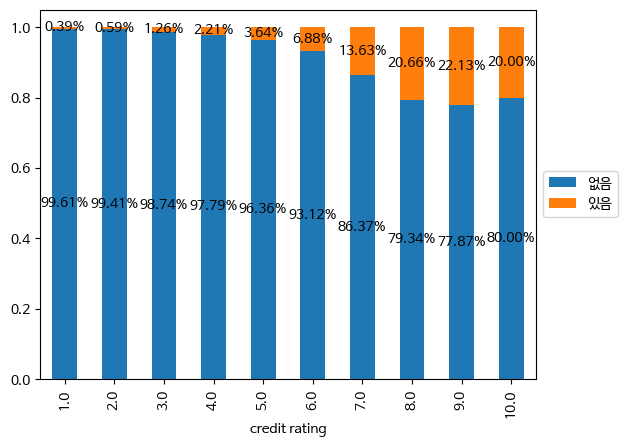

In [29]:
# 전체 고객 신용등급 별 연체 경험 비율
plt.figure(figsize=(10,10))
grouped = df_lcoct.groupby('credit rating')['overdue'].value_counts(normalize=True).unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height != 0:
      ax.text(x + width/2,
              y + height/2,
              '{:.2%}'.format(height),
              horizontalalignment='center',
              verticalalignment='center')
plt.show()

<Figure size 1000x1000 with 0 Axes>

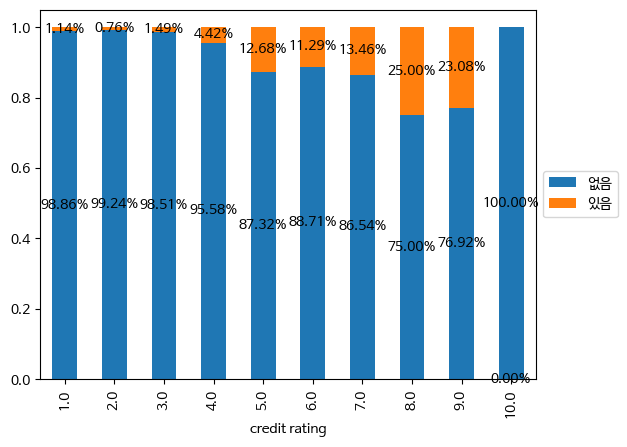

In [30]:
# 해약 고객 내 신용등급 별 연체 경험 비율
plt.figure(figsize=(10,10))
grouped = df_lcoct1_1.groupby('credit rating')['overdue'].value_counts(normalize=True).unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.2%}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.show()

<Figure size 1500x3000 with 0 Axes>

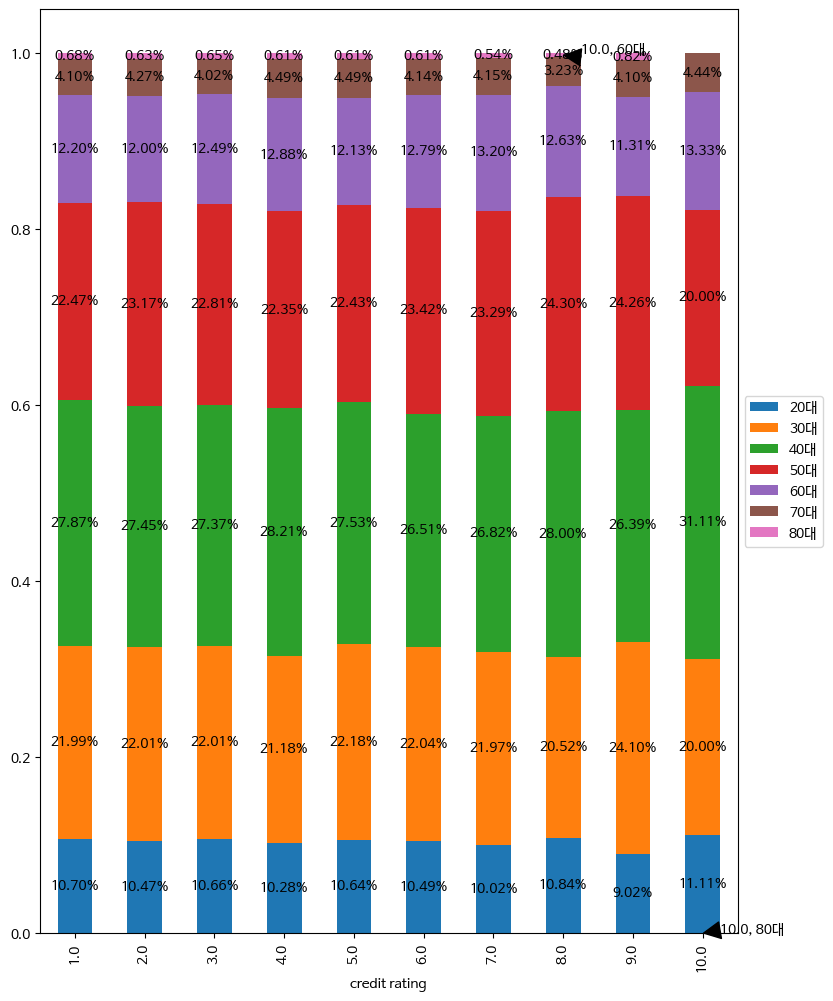

In [31]:
# 전체 고객 내 신용등급 별 연령 비율
grouped = df_lcoct.groupby('credit rating')['age_group'].value_counts(normalize=True).unstack()
group_names = [f'{a}, {b}' for a, b in grouped.stack().index]

plt.figure(figsize=(15,30))
ax = grouped.plot(kind='bar', stacked=True, figsize=(9,12))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    group_name = group_names[i]
    if height != 0:
      ax.text(x + width/2,
              y + height/2,
              '{:.2%}'.format(height),
              horizontalalignment='center',
              verticalalignment='center')
    if height < 0.005:  # height가 0.5% 미만인 경우 별도의 텍스트를 추가
      ax.annotate(f'{group_name}', xy=(x + width/2, y + height/2), xytext=(x + width, y + height),
                     arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

<Figure size 1500x3000 with 0 Axes>

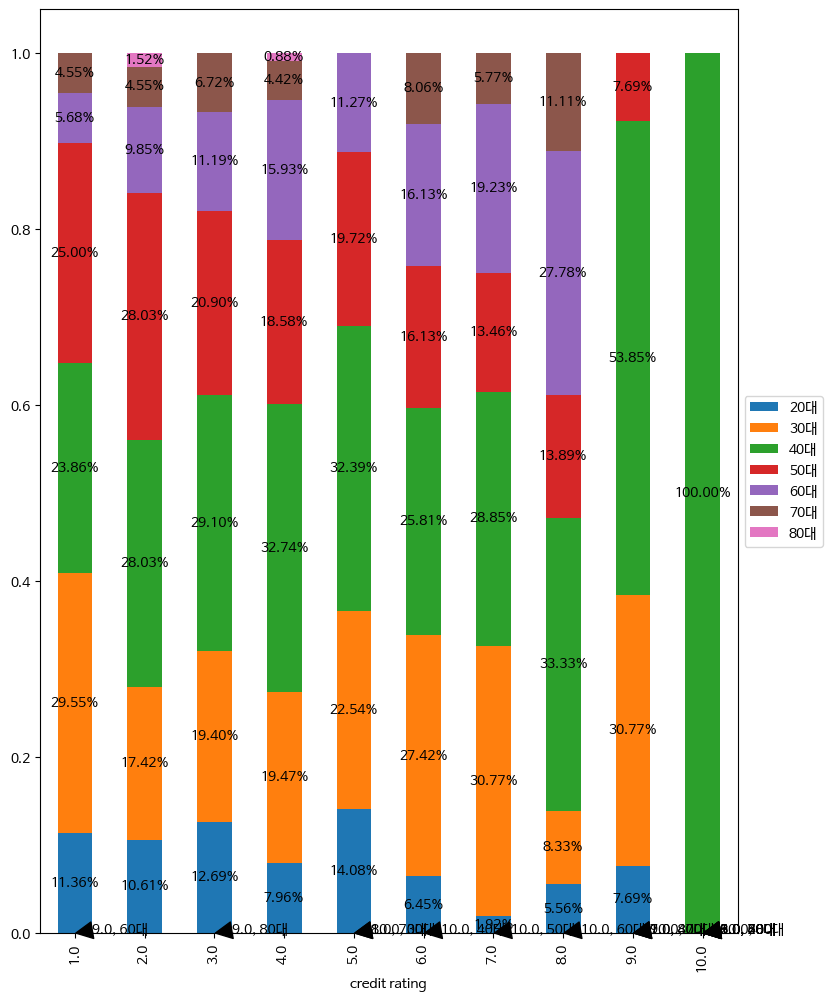

In [32]:
# 해약 고객 내 신용등급 별 연령 비율
grouped = df_lcoct1_1.groupby('credit rating')['age_group'].value_counts(normalize=True).unstack()
group_names = [f'{a}, {b}' for a, b in grouped.stack().index]

plt.figure(figsize=(15,30))
ax = grouped.plot(kind='bar', stacked=True, figsize=(9,12))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    group_name = group_names[i]
    if height != 0:
      ax.text(x + width/2,
              y + height/2,
              '{:.2%}'.format(height),
              horizontalalignment='center',
              verticalalignment='center')
    if height < 0.005:  # height가 0.5% 미만인 경우 별도의 텍스트를 추가
      ax.annotate(f'{group_name}', xy=(x + width/2, y + height/2), xytext=(x + width, y + height),
                     arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


<Figure size 1000x1000 with 0 Axes>

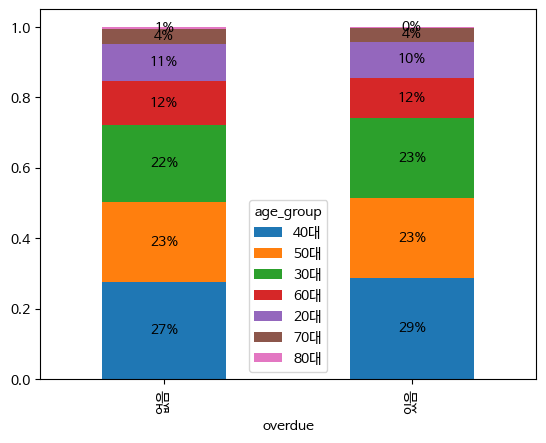

In [33]:
# 전체 고객 내 연체고객 별 연령 비율
plt.figure(figsize=(10,10))
grouped = df_lcoct.groupby('overdue')['age_group'].value_counts(normalize=True).unstack()
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.0%}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.show()

<Figure size 1000x1000 with 0 Axes>

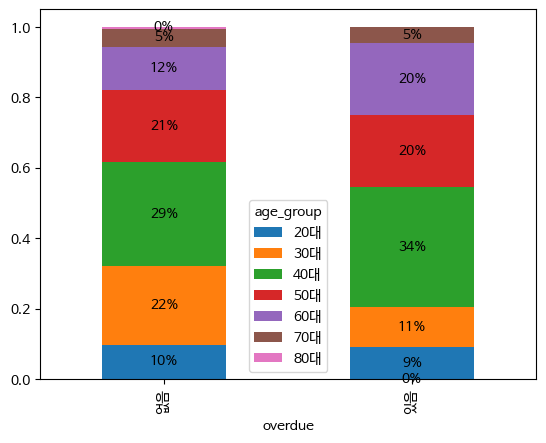

In [34]:
# 해약 고객 내 연체고객 별 연령 비율
plt.figure(figsize=(10,10))
grouped = df_lcoct1_1.groupby('overdue')['age_group'].value_counts(normalize=True).unstack()
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.0%}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.show()

IndexError: list index out of range

<Figure size 1500x3000 with 0 Axes>

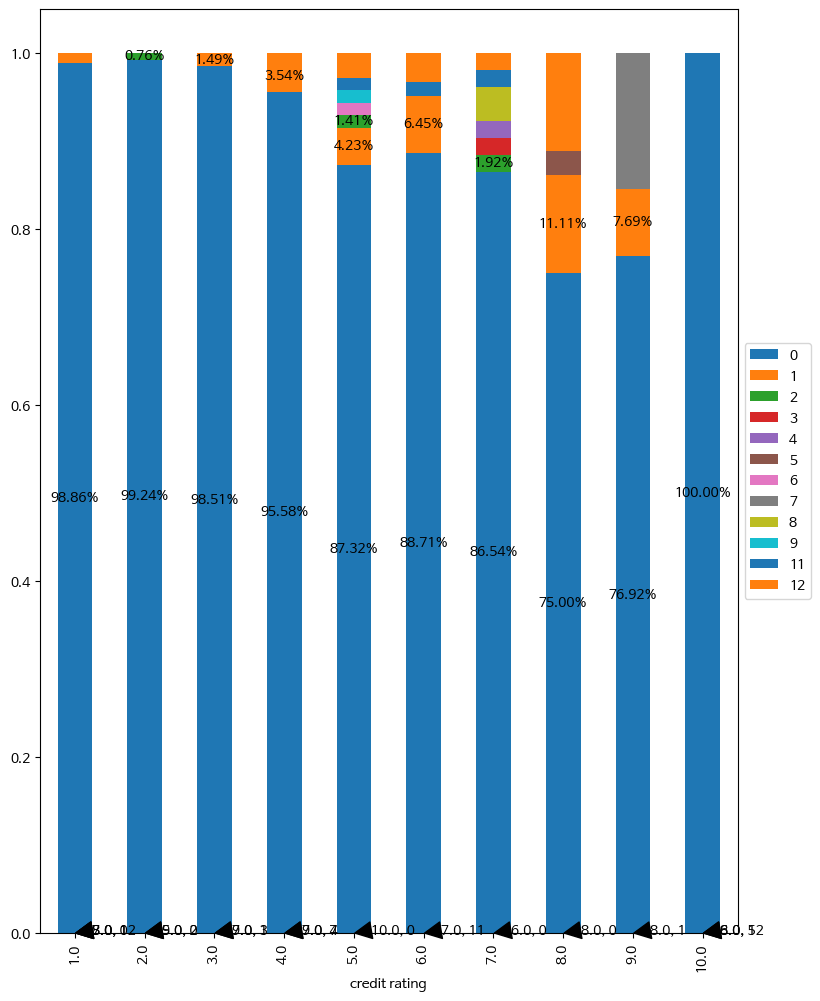

In [36]:
# 해약 고객 내 신용등급 별 연령 비율
groups = df_lcoct1_1.groupby('credit rating')['overdue_count'].value_counts(normalize=True).unstack()
group_names = [f'{a}, {b}' for a, b in groups.stack().index]

plt.figure(figsize=(15,30))
ax = groups.plot(kind='bar', stacked=True, figsize=(9,12))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    group_name = group_names[i]
    if height != 0:
      ax.text(x + width/2,
              y + height/2,
              '{:.2%}'.format(height),
              horizontalalignment='center',
              verticalalignment='center')
    if height < 0.005:  # height가 0.5% 미만인 경우 별도의 텍스트를 추가
      ax.annotate(f'{group_name}', xy=(x + width/2, y + height/2), xytext=(x + width, y + height),
                     arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()